Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












### Replicate the Lesson Code

* **Categorical** variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method.  

* **Discrete** variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects. 

* **Continuous** variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.  

In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# % is used to run non-python code: ie. terminal commands, debug, etc
# not required as I'm using colab


# %matplotlib inline


In [ ]:
# specifying the plot style to use with pandas and matplot lib
# default = fast
# STYLES : https://matplotlib.org/3.2.2/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

#### Part 1 - pandas built-in visualization tool

In [ ]:
# read in data
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
ship = pd.read_csv(url)
# get info on DF
print(ship.shape)
ship.head()

(712, 6)


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [ ]:
# cabin is a categorical value
  # displayed using number or string values
# create new column
  # map Pclass into categorical values
ship['cabin_class'] = ship['Pclass'].map({
      1:'first', 
      2:'second',
      3:'third'})
ship.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


In [ ]:
ship[ship['Pclass'] == 1]['Age']

1      38.0
3      35.0
5      54.0
10     58.0
20     28.0
       ... 
694    47.0
695    33.0
701    56.0
709    19.0
710    26.0
Name: Age, Length: 181, dtype: float64

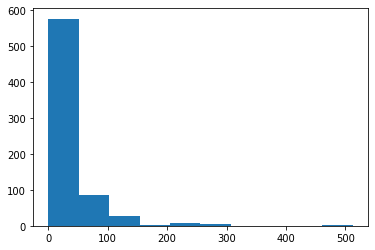

In [ ]:
# fare is continuous, so lets display it with a histogram
ship.Fare.hist(grid=False);
#ship['Fare'].plot(kind='hist');

In [ ]:
ship['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# max 512?! Remove extreme outliers
ship = ship[ship['Fare']<500].copy()
ship.shape

(709, 7)

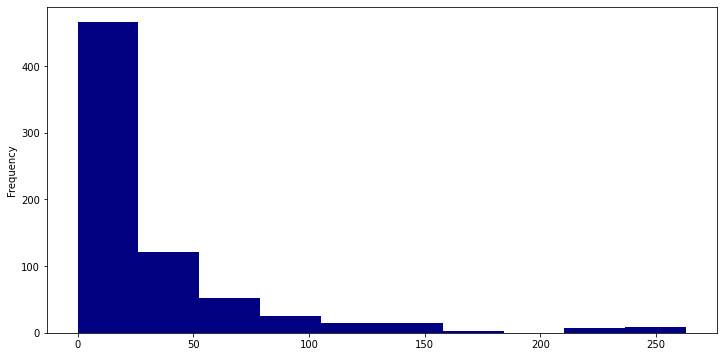

In [ ]:
# ^ removed 3
# redraw histogram
ship['Fare'].plot(kind='hist', color='navy', figsize=(12,6));

In [ ]:
# we can create categorical variables by using binning
# categorical variables = bins - 1 (usually?)
farebins = [0, 8, 15, 33, 500] # 5 bins, will create 4 categories
farelabels = ['low', 'med', 'high', 'very high']

In [ ]:
#  apply binning with pandas cut
ship['fare_groups'] = pd.cut(ship['Fare'], bins=farebins, labels=farelabels)
# view based on index
myresults = ship['fare_groups'].value_counts().sort_index()
myresults

low          154
med          189
high         185
very high    174
Name: fare_groups, dtype: int64

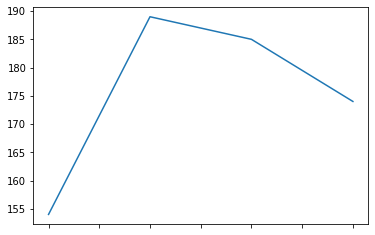

In [ ]:
# plot results
myresults.plot();

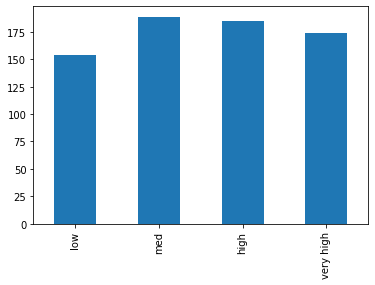

In [ ]:
myresults.plot(kind='bar');

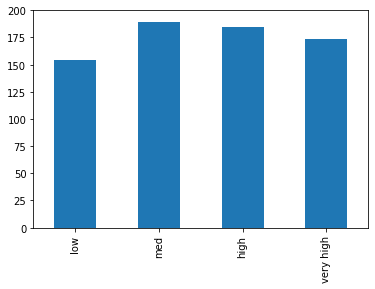

In [ ]:
# data exceeds graph, increase the height
myresults.plot(ylim=(0,200), kind='bar');

### Columns by conditions

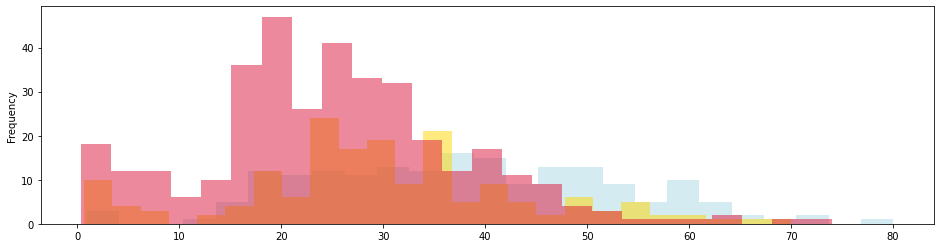

In [37]:
# stacked histogram
h_bins = 25
h_fig = (16,4)
h_alpha = 0.5
# in Age, if first class
ship[ship['Pclass'] == 1] ['Age'].plot(kind='hist', bins=h_bins, figsize=h_fig, color='lightblue', alpha=h_alpha);
# in Age, if second class
ship[ship['Pclass'] == 2] ['Age'].plot(kind='hist', bins=h_bins, figsize=h_fig, color='gold', alpha=h_alpha);
# in Age, if third class
ship[ship['Pclass'] == 3] ['Age'].plot(kind='hist', bins=h_bins, figsize=h_fig, color='crimson', alpha=h_alpha);

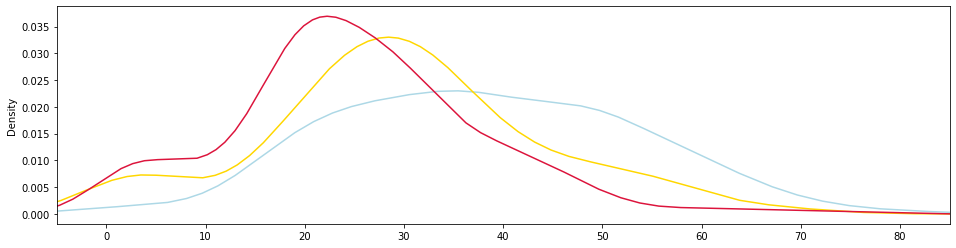

In [38]:
# Kernel Density Estimate (KDE)
# easier to read
d_xlim = (-5,85)
ship[ship['Pclass'] == 1] ['Age'].plot(kind='density', xlim=d_xlim, figsize=h_fig, color='lightblue');
# in Age, if second class
ship[ship['Pclass'] == 2] ['Age'].plot(kind='density', xlim=d_xlim, figsize=h_fig, color='gold');
# in Age, if third class
ship[ship['Pclass'] == 3] ['Age'].plot(kind='density', xlim=d_xlim, figsize=h_fig, color='crimson');

In [39]:
# display a single categorical variable
fare_results = ship['fare_groups'].value_counts().sort_index()
fare_results

low          154
med          189
high         185
very high    174
Name: fare_groups, dtype: int64

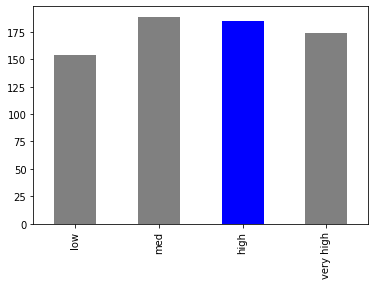

In [40]:
# bar chart with results, make a single value pop
fare_results.plot(kind='bar', color=['gray', 'gray', 'blue', 'gray']);

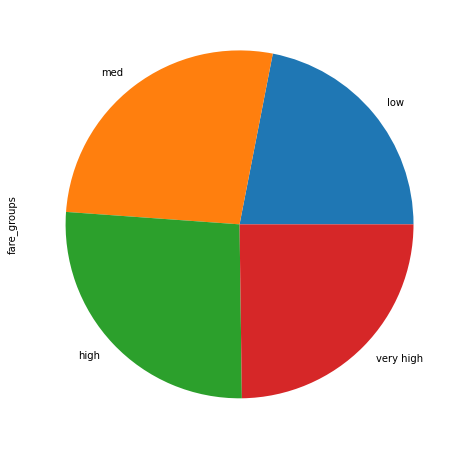

In [41]:
# pie chart
fare_results.plot(kind='pie', figsize=(8,8));

In [43]:
# compare two categorical variables with crosstabs, save result
death_cab = pd.crosstab(ship['cabin_class'], ship['Survived'], normalize='index')
death_cab

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


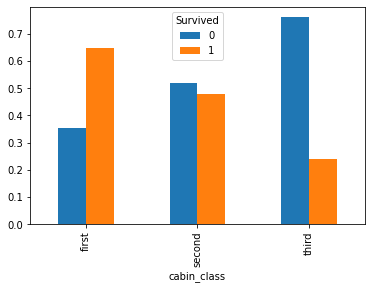

In [45]:
# display as bar chart
death_cab.plot(kind='bar');

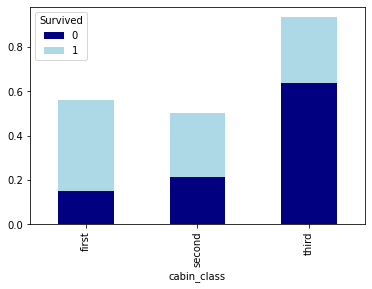

In [47]:
death_cab2 = pd.crosstab(ship['cabin_class'], ship['Survived'], normalize='columns')
death_cab2.plot(kind='bar', stacked=True, color=['navy', 'lightblue']);


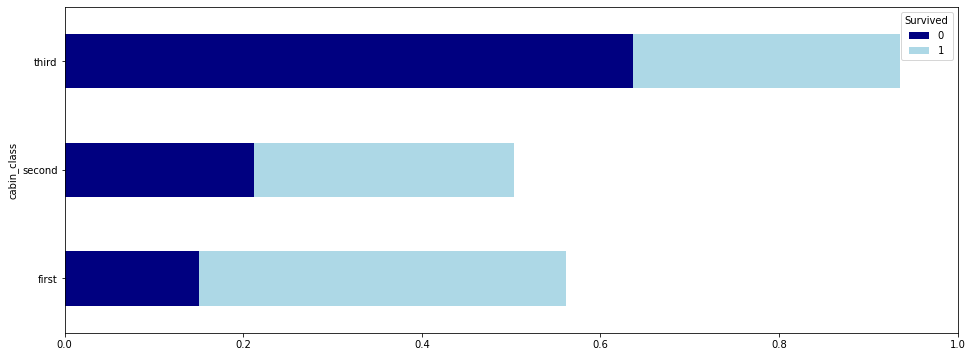

In [52]:
# another way to view the stacked barchart
death_cab2.plot(kind='barh', stacked=True, color=['navy', 'lightblue'], figsize=(16,6), xlim=(0,1) );


In [56]:
# look at a single continuous variable
print(ship['Age'].mean())
# get informatino on Age columns
ship['Age'].describe()

29.618011283497882


count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
# view the mean of a continuous variable Age by the categorical variable cabin class

cab_age = ship.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

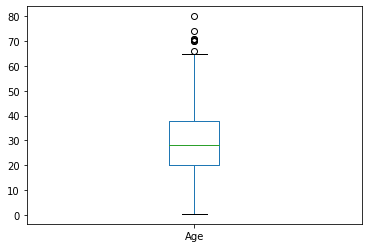

In [57]:
# visualize the mean of a single continuous variable Age by the categorical variable cabin class

ship['Age'].plot(kind='box');

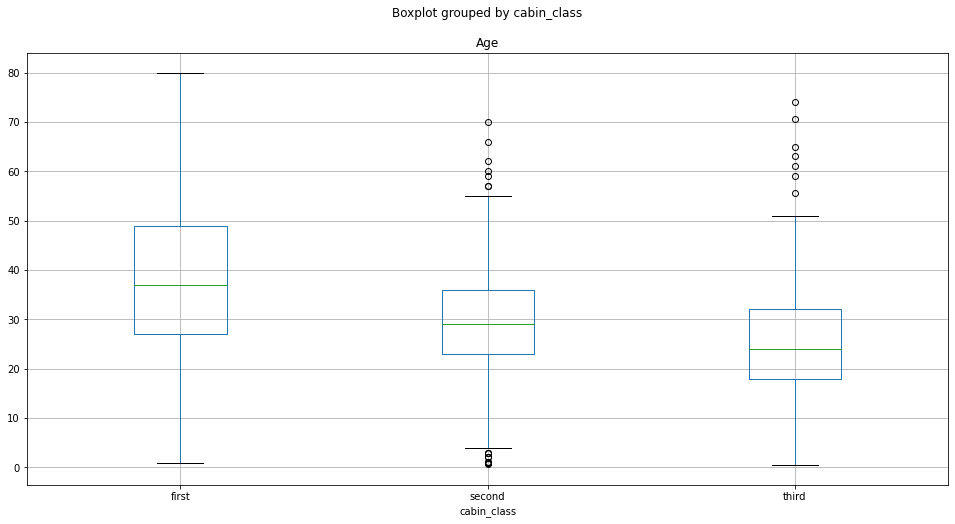

In [58]:
# view the mean of a continuous variable Age by the categorical variable cabin class

ship.boxplot(column='Age', by='cabin_class', figsize=(16,8));

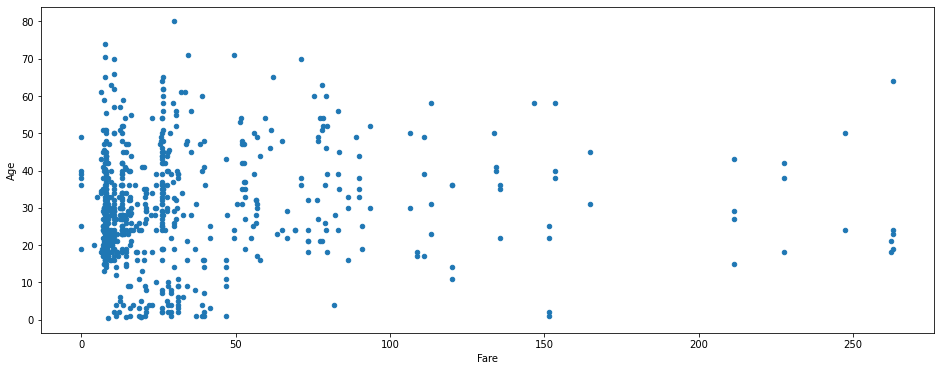

In [59]:
# two continuous variables: age by fare
ship.plot(kind='scatter', x='Fare', y='Age', figsize=(16,6));

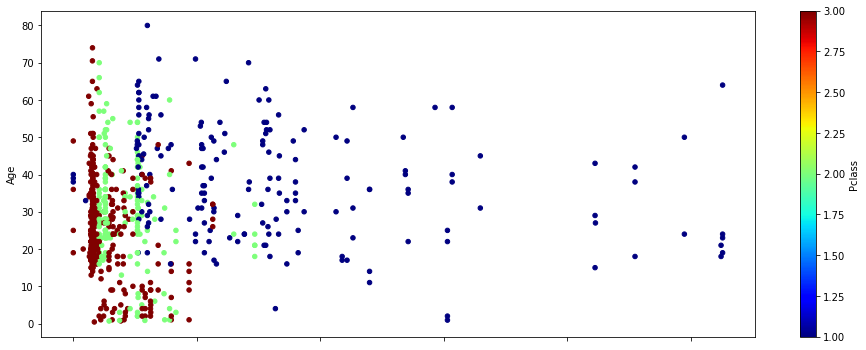

In [61]:
# two continuous variables: age by fare
ship.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='jet', figsize=(16,6));

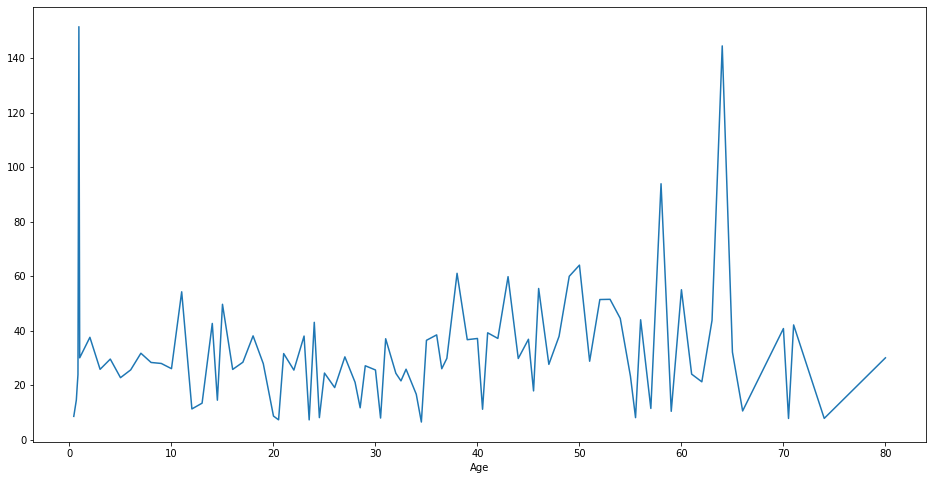

In [62]:
# line chart age by fare
ship.groupby('Age')['Fare'].mean().plot(figsize=(16,8));

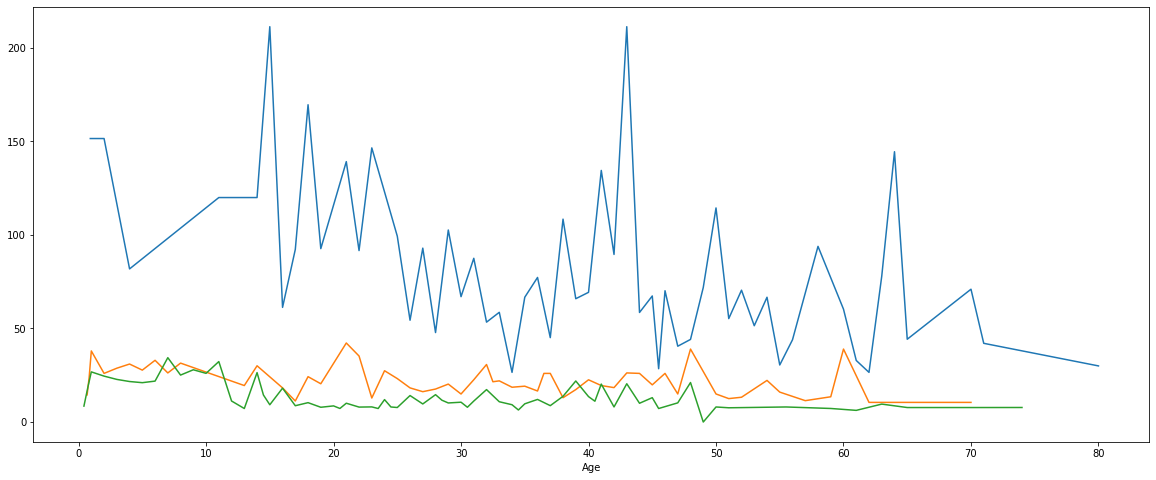

In [64]:
# for the cabin classes, print a chart
for x in [1,2,3]:
  ship[ship['Pclass'] == x].groupby('Age')['Fare'].mean().plot(figsize=(20, 8)); # By age, get Fare mean, for cabin class

In [65]:
mycorr_matrix = ship.corr()
mycorr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


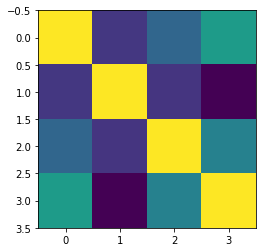

In [66]:
plt.imshow(mycorr_matrix);

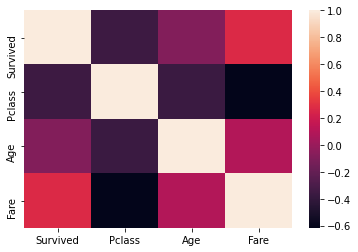

In [67]:
# easier, and better looking with seaborn
sns.heatmap(mycorr_matrix);

### Intro to Matplotlib

In [68]:
# Data to plot
x = np.linspace(0, 5, 11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [69]:
y = x**2
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

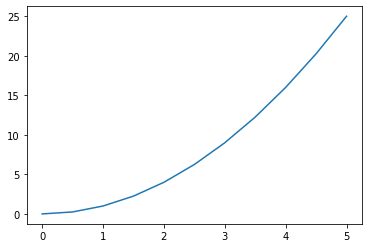

In [70]:
# X = (0,0) -> (5, 25) 
# Y = (0,0) -> (25,5)
plt.plot(x,y);

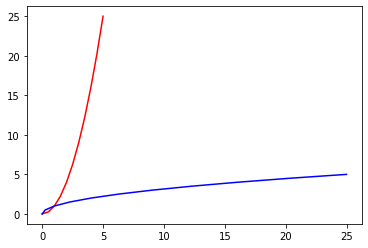

In [71]:
# you can plot two points, and add some color
plt.plot(x,y, 'r')
plt.plot(y,x, 'b')
plt.show()

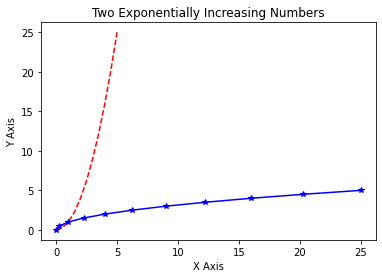

In [72]:
# add some labels and texture

# title
plt.title('Two Exponentially Increasing Numbers')
# labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
# plot
plt.plot(x,y, 'r--')
plt.plot(y,x, 'b*-')
plt.show()

#### Creating multiple columns on same canvas


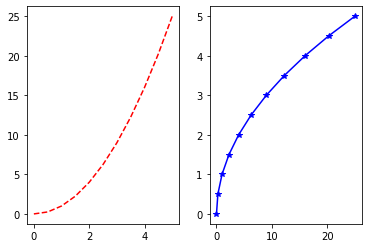

In [73]:
# plt.subplot(nrows, ncols, plot_number)
# first col
plt.subplot(1,2,1)
plt.plot(x,y, 'r--')
# second col
plt.subplot(1,2,2)
plt.plot(y,x, 'b*-')

plt.show()

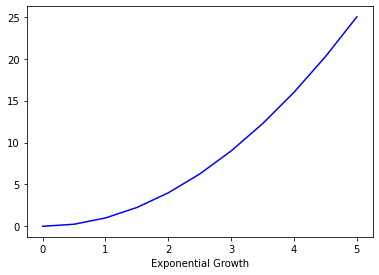

In [78]:
# create the empty canvas
fig = plt.figure()

# add a set of axes to the figure
    # [ left, bottom, width, height ]
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot
ax.plot(x, y, 'b')
# add label
ax.set_xlabel('Exponential Growth')

plt.show()

####Subplots

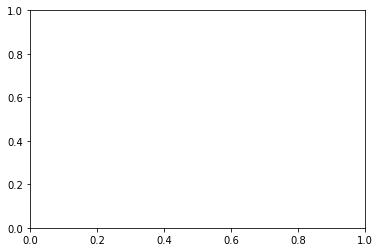

In [80]:
fig, ax = plt.subplots()

###Imitate a real-world example

In [81]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

####Fake Prototype

In [82]:
# available styles in matplotlib
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [83]:
# creat fake data to replicate blog post feature
fakelist = [38, 3, 2, 1, 2, 4, 6, 5, 5, 33]
# makea series
  # index=range(1,11) - used to give vote # 1-10 to index
fake = pd.Series(fakelist, index=range(1,11))

fake

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

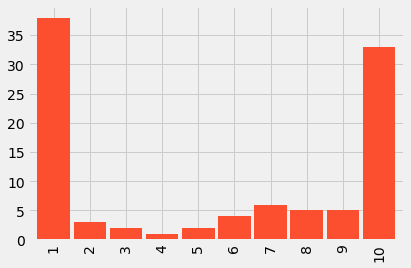

In [84]:
fake.plot.bar(color='C1', width=0.9);

In [85]:
display(example)

In [ ]:
# looks pretty close

In [87]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


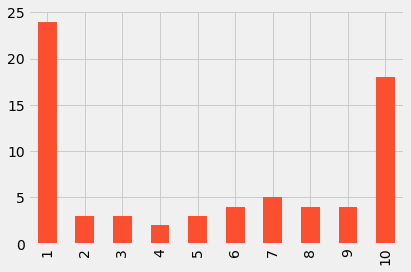

In [90]:
fake2 = pd.Series(fakelist2)
# get the number of times value is found, sort it, then plot
fake2.value_counts().sort_index().plot.bar(color='C1');

####Annotate with text

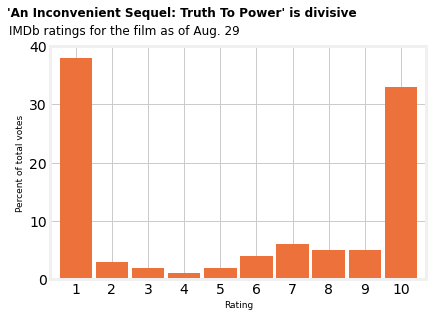

In [104]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

# bar width and color
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')
# set the title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=0.35,
             y=1.1,
             fontweight='bold')

ax.text(s="IMDb ratings for the film as of Aug. 29", 
             fontsize=12, 
             x=-1.85, 
             y=42)

# set the x and y labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# fix the x and y axis tick marks 
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))

#make sure y ticks are set
ax.set_yticks(range(0,50,10));




###Recreate 

multiple box charts- 
https://fivethirtyeight.com/features/voter-registrations-are-way-way-down-during-the-pandemic/

2 color line chart - 
https://fivethirtyeight.com/features/the-media-frenzy-around-biden-is-fading/

scatter plots - 
https://fivethirtyeight.com/features/the-democratic-presidential-candidates-are-becoming-less-popular/

line chart with scatters - 
https://projects.fivethirtyeight.com/impeachment-polls/

In [160]:
voters_CA = {
    'state': ['Arizona', 'Arizona','Arizona','Arizona'],
    'voters' : [60000,110000,10000,-120000],
    'year' : [2016,2016,2016,2020]
}
votes  = pd.DataFrame(data=voters_CA)
results_CA = votes.groupby('state')['voters']


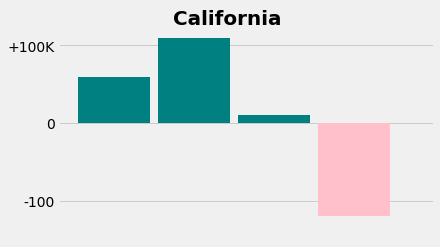

In [161]:
fix, ax = plt.subplots()

results_CA.plot.bar(width=0.9, color=['teal', 'teal', 'teal', 'pink'])
# set title
ax.set_title("California",
             fontsize=20,
             x = .45,
             y = .9,
             fontweight='bold')

# set y limits
ax.set_ylim(-150000,150000)
# only show 4 bars
ax.set_xticks(range(0,5,1))
# limit y ticks
ax.set_yticks([-100000, 0, 100000])
# assign strings to y tick labels
ax.set_yticklabels(['-100', '0', '+100K'])
# disable bottom ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
#disable y grid
plt.grid(axis='x', which='both', visible=False)


#results.plot.bar(color=['teal', 'teal', 'teal', 'pink'])

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here